In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc, rcParams
import numpy as np 
import pandas as pd
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd, find_optimal_celestial_wcs
from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.wcs as wcs
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.io import ascii
import glob

In [2]:
# Plot Setup

rcParams['font.size'] = 12.
rcParams['axes.titlepad'] = 5
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = False
rcParams['ytick.right'] = False
font = {'family': 'normal', 'size': 12}
rc('axes', linewidth=1)
rc("text", usetex=True)
rc('font', family='serif')
rc('legend', fontsize=12)
rc('xtick.major', size=6, width=1.5)
rc('ytick.major', size=6, width=1.5)
rc('xtick.minor', size=4, width=1)
rc('ytick.minor', size=4, width=1)

In [3]:
# Fits files can be loaded from 
# DISK: https://ztf.snad.space/products/sci/2019/0104/112905/ 
# DEEP: https://ztf.snad.space/products/sci/2018/0813/159086/ 
# M31: https://ztf.snad.space/products/sci/2019/0804/449687

pw = '695_M31/'

### load fits files
image_files = []
for name in sorted(glob.glob(pw + '*.fits')): 
    image_files.append(name)

images =  [fits.open(url)[0] for url in image_files]


### load file with anomaly candidates in RA (deg), Dec (deg)
Stars = ascii.read(pw + 'anomalies_m31', 'r')

In [4]:
wcs_out, shape_out = find_optimal_celestial_wcs(images, auto_rotate=True)

In [5]:
array, footprint = reproject_and_coadd(images,
                                       wcs_out, shape_out=shape_out,
                                       reproject_function=reproject_interp)

<IPython.core.display.Javascript object>


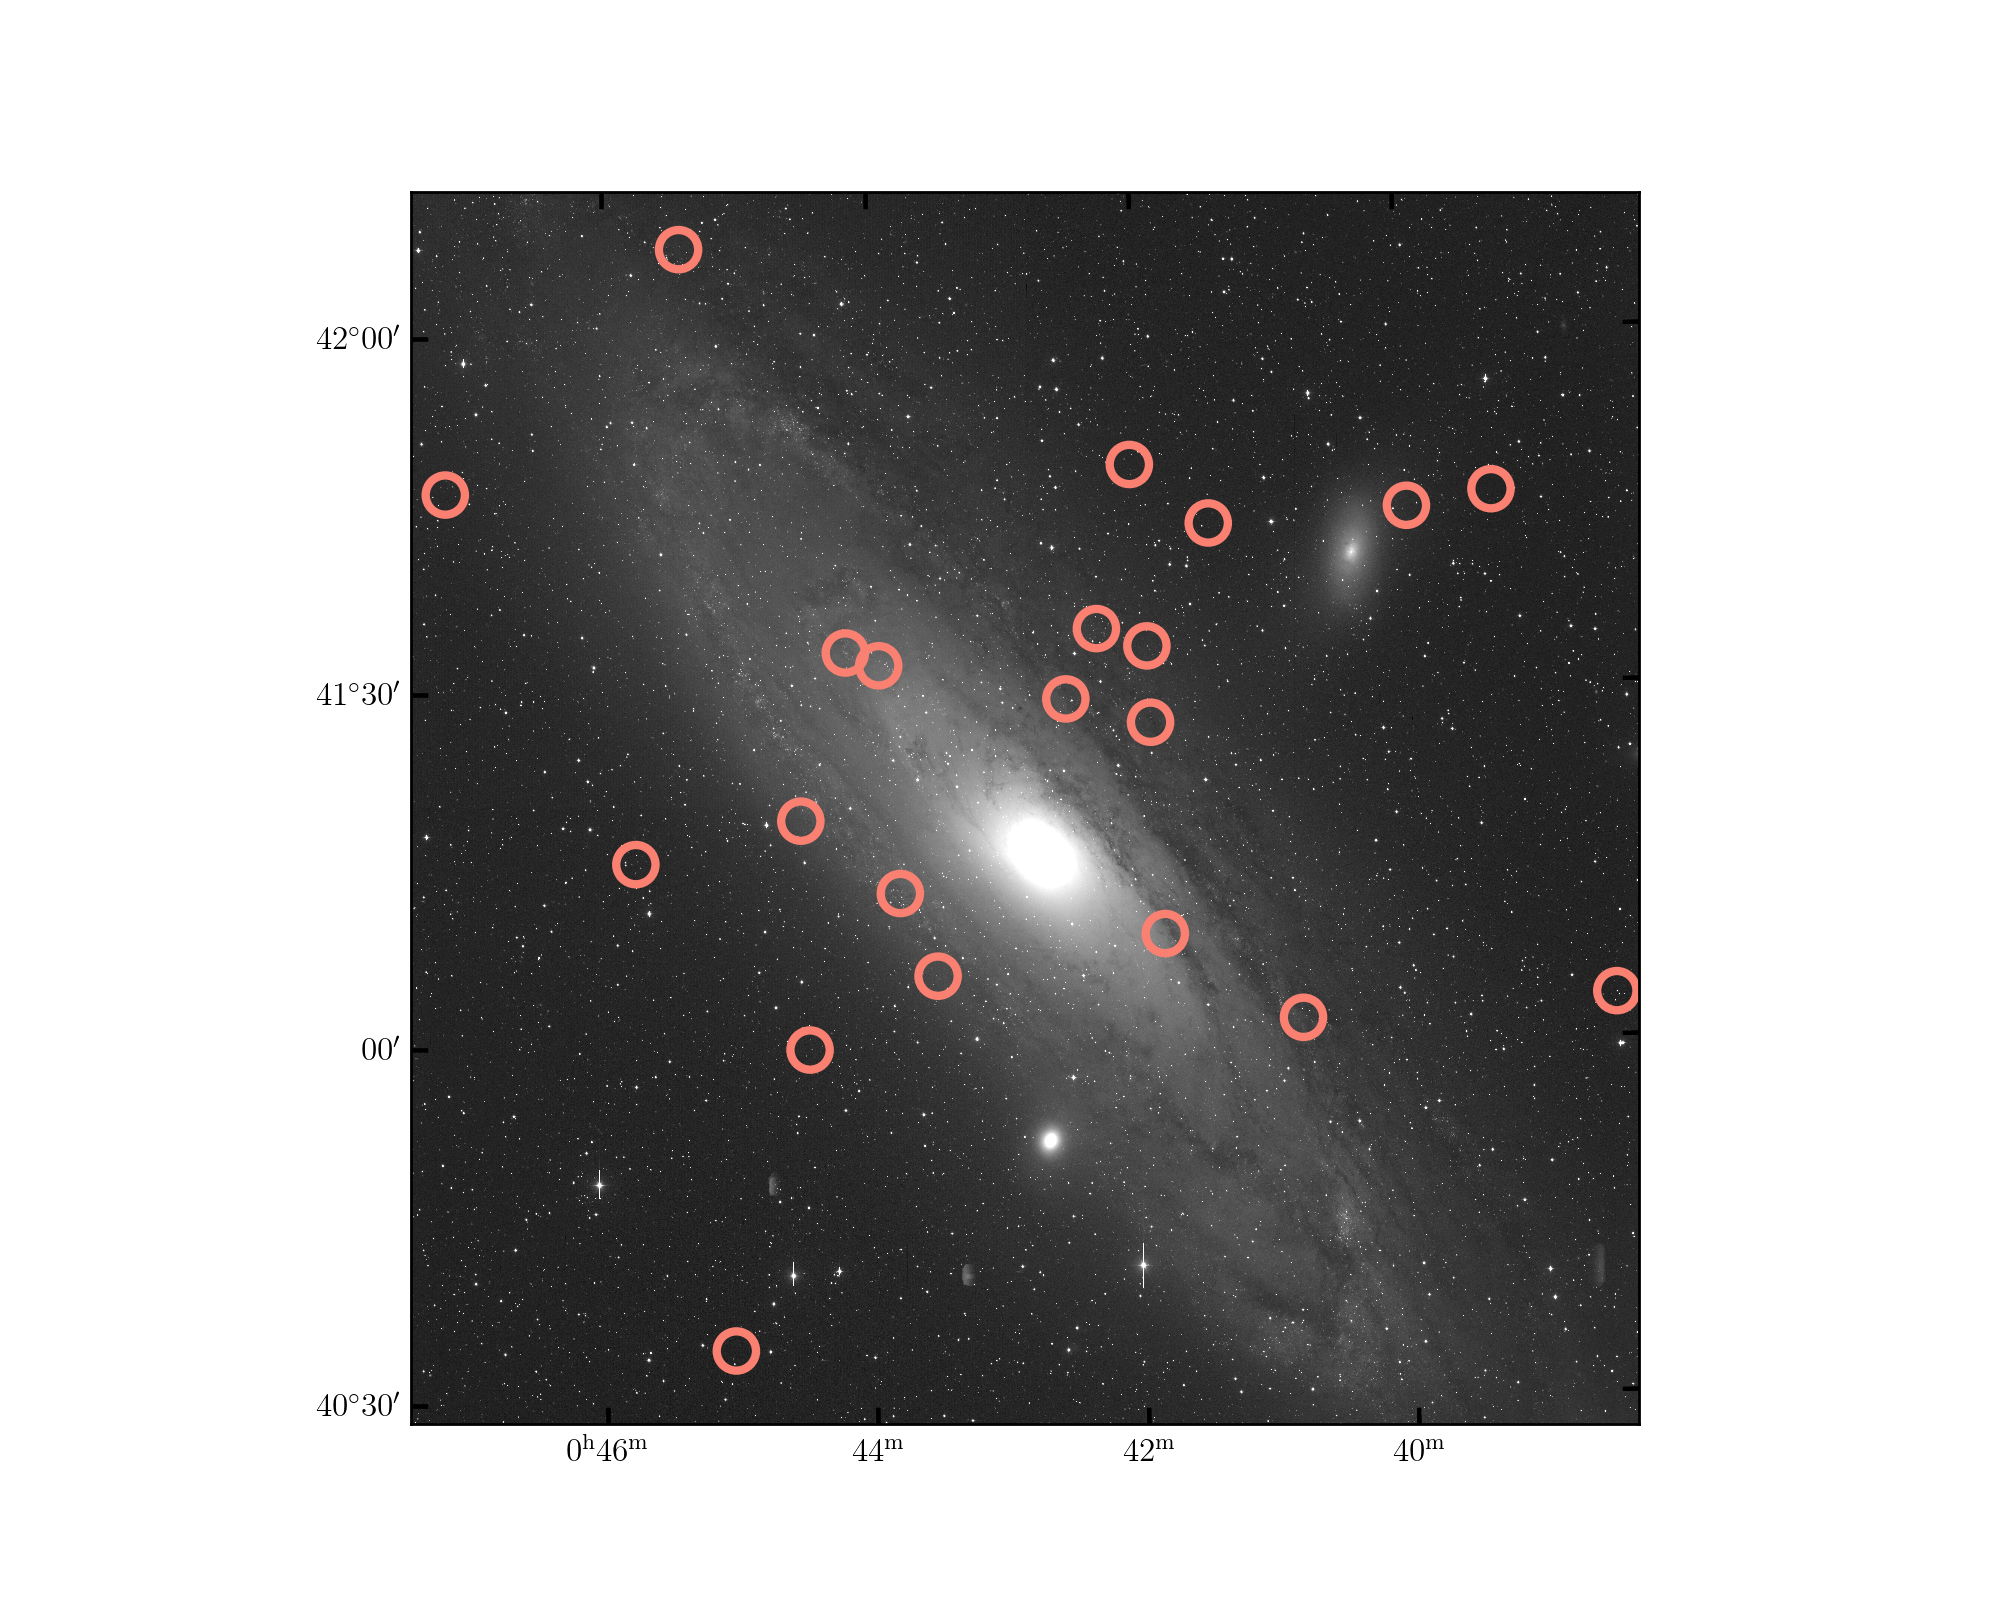

In [6]:
### plot stacked fits
plt.figure(figsize=(10, 8))

# m31 vmin=50, vmax=700
# deep, disk vmin=100, vmax=1000

ax = plt.subplot(1, 1, 1, projection=wcs_out)
im = ax.imshow(array,  vmin=50, vmax=700, cmap='gray', norm=LogNorm())
ax.scatter(Stars['col1'], Stars['col2'], transform=ax.get_transform('fk5'),\
            s = 200, edgecolor='salmon', facecolor='none', linewidths=3)